# Labo 4: Práctica Especial

In [10]:
import numpy as np 
from scipy import optimize
import matplotlib.pyplot as plt
import os
from IPython import get_ipython
from scipy.optimize import curve_fit
import pandas as pd
from scipy.signal import find_peaks
from scipy.interpolate import UnivariateSpline
from scipy import signal as sg
plt.rcParams["font.family"] = "serif"
figsize = (7, 5)
fontsize_title=15
from matplotlib import colors

#os.chdir (r'C:\Users\Sergio\Desktop\labo\pc nico')
get_ipython().run_line_magic('matplotlib', 'inline')
#get_ipython().run_line_magic('matplotlib', 'qt5')

### Importar Datos

In [11]:
file1 = ' caracterizacion calorimetro2022-11-09 12-03-22.csv'

datos1 = np.loadtxt(file1, delimiter=',', skiprows=1, unpack=True)

V=datos1[2]
t=datos1[1]
t -= t[0]
#%% ajustes para transformar V a T

file = 'tablas termocupla.txt'

Misdatos = np.loadtxt(file, delimiter=',', skiprows=0) 

Misdatos_ordenados = Misdatos[np.argsort(Misdatos[:, 0])]


V0= Misdatos_ordenados[:,3] # Presión detectada en mBar
errorP= V0*0.01

grados = Misdatos_ordenados[:,0] # Tiempo transcurrido en seg
errort = 0

n_res = len(V0) # Guardamos el largo del vector en esta variable
#print(n_res)
#print(len(grados))



### Conversión de V a Grados

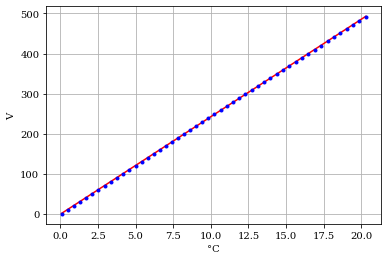

para el modelo de conversión °C=A*V+B
A 24.311270208894886 +/- 0.031357346836726564
B -0.6274598666158002 +/- 0.3674453844586629 obtenida del ajuste


In [12]:

def fun(x, A, B):
    return A*x+B


#Acá digo que quiero los resultados "res" y la matriz de covarianza "cov" en el ajuste de mis datos con el modelo propuesto

res, cov = curve_fit(fun, V0, grados)  #Los errores de R y L corresponden a la raíz cuadrada de la diagonal de la matriz de covarianza

A = res[0]
errorA = np.sqrt(cov[0,0])
B = res[1]
errorB = np.sqrt(cov[1,1])

#Defino el dominio que grafico mi modelo

x = np.linspace(V0[0],V0[-1],100)

#Grafico mis datos y el modelo obtenido en la misma gráfica

fig, axes = plt.subplots()
plt.errorbar(V0, grados, xerr=errort,yerr=errorP, fmt=".b")
axes.plot(x, fun(x, A, B), 'r-') #Pongo los valores obtenido en "res"
plt.grid()
#plt.axis([0,2,0,3.5]) #permite seleccionar la escala
plt.ylabel('V')
plt.xlabel('°C')
plt.show()

#Ahora, con estos datos podemos saber el valor de los parámetros Q/V y P0

P0 = Misdatos_ordenados[0,0]
errorP0 = P0 * 0.01
print("para el modelo de conversión °C=A*V+B")
print('A', A, '+/-', errorA) #Valor de Q/V que corresponde al valor de A
print('B', B, '+/-', errorB, 'obtenida del ajuste') #Valor de P0 del ajuste que corresponde al valor de B
# print('o.o', P0, '+/-', errorP0, 'obtenida de los datos') #Valor de P0 de los datos




### Caracterización calorímetro

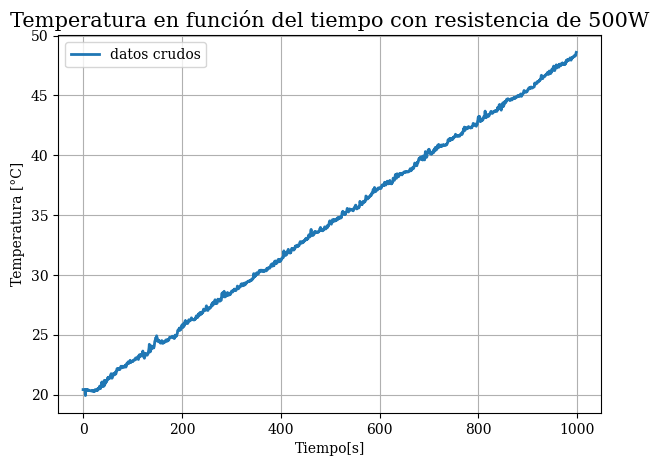

Cc= 488.6361386944609 +/- 5.089407392951848
T0= 19.937970700691842 +/- 0.007662099279158945


<Figure size 700x500 with 0 Axes>

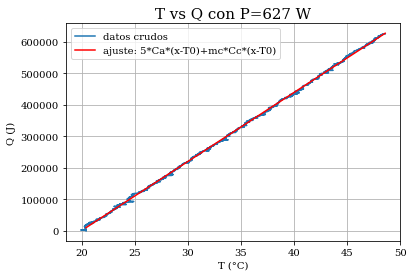

In [13]:

file1 = ' caracterizacion calorimetro2022-11-09 12-03-22.csv'

datos1 = np.loadtxt(file1, delimiter=',', skiprows=1, unpack=True)

Ca=4186 #calor especifico agua en joules
mc=2 #masa calorimetro en kg
ma=5 #masa de agua

V=datos1[2]*1000
t=datos1[1]
t -= t[0]

T=A*V+B+27

T=T[:1900]
t=t[:1900]

#tiempo=np.arange(0,len(p)/10000,0.0001)

#grafico temp en funcion del tiempo caract calorimetro
plt.close('all')
plt.figure(figsize =figsize, dpi=100)
plt.plot(t,T, linewidth = 2,label = 'Ajuste Lineal')
plt.title("Temperatura en función del tiempo con resistencia de 500W",fontsize=fontsize_title)
plt.grid()
plt.xlabel("Tiempo[s]")
plt.ylabel("Temperatura [°C]")
plt.legend(['datos crudos','ajuste: C+D*np.exp(-K*x)'])
plt.show()

#%% ajuste para saber calor especifico calorimetro
Q=627*t

def fun(x, Cc,T0):
    return 5*Ca*(x-T0)+mc*Cc*(x-T0)


#Acá digo que quiero los resultados "res" y la matriz de covarianza "cov" en el ajuste de mis datos con el modelo propuesto

res, cov = curve_fit(fun, T, Q)  #Los errores de R y L corresponden a la raíz cuadrada de la diagonal de la matriz de covarianza

Cc = res[0]
errorCc = np.sqrt(cov[0,0])
T0 = res[1]
errorT0 = np.sqrt(cov[1,1])

print('Cc=', Cc, '+/-', errorCc) #Valor de A
print('T0=', T0, '+/-', errorT0) #Valor de B

#Defino el dominio que grafico mi modelo

x = np.linspace(T[0],T[-1],500)

#Grafico mis datos y el modelo obtenido en la misma gráfica
plt.figure(figsize =figsize, dpi=100)
fig, axes = plt.subplots()
plt.ion()
plt.plot(T, Q)
axes.plot(x, fun(x,Cc,T0), 'r-') #Pongo los valores obtenido en "res"
plt.title("T vs Q con P=627 W",fontsize=fontsize_title)
plt.grid()
#plt.axis([0,2,0,3.5]) #permite seleccionar la escala
plt.ylabel('Q (J)')
plt.xlabel('T (°C)')
plt.legend(['datos crudos','ajuste: 5*Ca*(x-T0)+mc*Cc*(x-T0)'])
plt.show()
#esta dando 4800 el calor especifico del calorimetro


### Enfriamiento Hierro

kh= 0.0068733356334339715 +/- 5.6676779156430914e-05
Ch= 49.52057853354757 +/- 0.00555837745476858
Dh= 3.4036398802372854 +/- 0.013274023294189705


C:\Users\NICOLS~1\AppData\Local\Temp/ipykernel_10068/252538619.py:20: RuntimeWarning: overflow encountered in exp
  return Ch+Dh*np.exp(-Kh*x)
C:\Users\NICOLS~1\AppData\Local\Temp/ipykernel_10068/252538619.py:20: RuntimeWarning: overflow encountered in multiply
  return Ch+Dh*np.exp(-Kh*x)


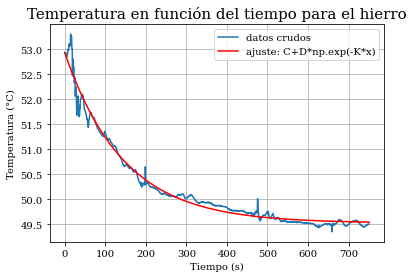

calor especifico hierro 814.3627368069923


In [14]:

#%% enfriamiento hierro

Ca=4186 #calor especifico agua en joules
mc=2 #masa calorimetro en kg
ma=5 #masa de agua
mh=3 #masa hierro 

file2 = '3kg hierro+agua2022-11-09 12-42-18.csv'

datos2 = np.loadtxt(file2, delimiter=',', skiprows=1, unpack=True)

V2=datos2[2]*1000
t2=datos2[1]
t2 -= t2[0]

T2=A*V2+B+27


def fun(x, Kh,Ch,Dh):
    return Ch+Dh*np.exp(-Kh*x)


#Acá digo que quiero los resultados "res" y la matriz de covarianza "cov" en el ajuste de mis datos con el modelo propuesto

res, cov = curve_fit(fun, t2, T2)  #Los errores de R y L corresponden a la raíz cuadrada de la diagonal de la matriz de covarianza

Kh = res[0]
errorKh = np.sqrt(cov[0,0])
Ch = res[1]
errorCh = np.sqrt(cov[1,1])
Dh = res[2]
errorDh = np.sqrt(cov[2,2])

print('kh=', Kh, '+/-', errorKh) #Valor de A
print('Ch=', Ch, '+/-', errorCh) #Valor de B
print('Dh=', Dh, '+/-', errorDh)
#Defino el dominio que grafico mi modelo

x = np.linspace(0,t2[-1],500)

fig, axes = plt.subplots()
plt.plot(t2, T2)
axes.plot(x, fun(x, Kh,Ch,Dh), 'r-') #Pongo los valores obtenido en "res"
plt.title("Temperatura en función del tiempo para el hierro",fontsize=fontsize_title)
plt.grid()
#plt.axis([0,2,0,3.5]) #permite seleccionar la escala
plt.ylabel('Temperatura (°C)');
plt.xlabel('Tiempo (s)')
plt.legend(['datos crudos','ajuste: C+D*np.exp(-K*x)'])
plt.show()


Ceh = (ma*Ca*Dh + mc*Cc*Dh) / (mh*(Ch-19))
print("calor especifico hierro",Ceh)

#ceh = (-ma*Ca* - cc*toa) / (mh*(te-toh))




### Enfriamiento 27 barras latón

kl= 0.023435920527649454 +/- 0.0003664417359253306
Cl= 50.205389365878695 +/- 0.00793377080426065
Dl= 5.493242622106231 +/- 0.06841566581187156


C:\Users\NICOLS~1\AppData\Local\Temp/ipykernel_10068/3963719820.py:19: RuntimeWarning: overflow encountered in exp
  return Cl+Dl*np.exp(-Kl*x)
C:\Users\NICOLS~1\AppData\Local\Temp/ipykernel_10068/3963719820.py:19: RuntimeWarning: overflow encountered in multiply
  return Cl+Dl*np.exp(-Kl*x)


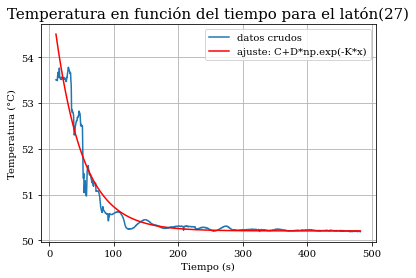

calor especifico laton 555.6916207592401


In [15]:

#%%
file3 = '27 barras laton+agua2022-11-09 13-57-40.csv'
ml= 4.3 #masa de las 27 barras de laton 
datos3 = np.loadtxt(file3, delimiter=',', skiprows=1, unpack=True)

V3=datos3[2]*1000
t3=datos3[1]
t3 -= t3[0]

#recorto la info q no sirve

V3=V3[20:]
t3=t3[20:]

T3=A*V3+B+27


def fun(x, Kl,Cl,Dl):
    return Cl+Dl*np.exp(-Kl*x)


#Acá digo que quiero los resultados "res" y la matriz de covarianza "cov" en el ajuste de mis datos con el modelo propuesto

res, cov = curve_fit(fun, t3, T3)  #Los errores de R y L corresponden a la raíz cuadrada de la diagonal de la matriz de covarianza

Kl = res[0]
errorKl = np.sqrt(cov[0,0])
Cl = res[1]
errorCl = np.sqrt(cov[1,1])
Dl = res[2]
errorDl = np.sqrt(cov[2,2])

print('kl=', Kl, '+/-', errorKl) #Valor de A
print('Cl=', Cl, '+/-', errorCl) #Valor de B
print('Dl=', Dl, '+/-', errorDl)
#Defino el dominio que grafico mi modelo

x = np.linspace(t3[0],t3[-1],500)

fig, axes = plt.subplots()
plt.plot(t3, T3)
axes.plot(x, fun(x, Kl,Cl,Dl), 'r-') #Pongo los valores obtenido en "res"
plt.title("Temperatura en función del tiempo para el latón(27)",fontsize=fontsize_title)
plt.grid()
#plt.axis([0,2,0,3.5]) #permite seleccionar la escala
plt.ylabel('Temperatura (°C)')
plt.xlabel('Tiempo (s)')
plt.legend(['datos crudos','ajuste: C+D*np.exp(-K*x)'])
plt.show()

Cel = (ma*Ca*Dh + mc*Cc*Dh) / (ml*(Cl-19))
print("calor especifico laton",Cel)

### equilibrio agua-HIELO

C:\Users\NICOLS~1\AppData\Local\Temp/ipykernel_10068/13947952.py:19: RuntimeWarning: overflow encountered in exp
  return Chi+Dhi*np.exp(-Khi*x)


khi= 0.009661273162942848 +/- 0.00012731173546948296
Chi= 14.410168766346185 +/- 0.02029488580236065
Dhi= 9.250096715682574 +/- 0.0694332669549042


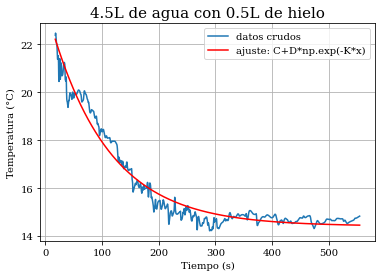

In [16]:
file4 = 'equilibrio agua hielo 4,5L2022-11-16 11-43-02.csv'

datos4 = np.loadtxt(file4, delimiter=',', skiprows=1, unpack=True)

R4=datos4[2] #agregar factor mult
t4=datos4[1]
t4 -= t4[0]

#recorto la info q no sirve
R4=R4[40:]
t4=t4[40:]
##
T4=(R4-100)/0.385



#ajustes
def fun(x, Khi,Chi,Dhi):
    return Chi+Dhi*np.exp(-Khi*x)


#Acá digo que quiero los resultados "res" y la matriz de covarianza "cov" en el ajuste de mis datos con el modelo propuesto

res, cov = curve_fit(fun, t4, T4)  #Los errores de R y L corresponden a la raíz cuadrada de la diagonal de la matriz de covarianza

Khi = res[0]
errorKhi = np.sqrt(cov[0,0])
Chi = res[1]
errorChi = np.sqrt(cov[1,1])
Dhi = res[2]
errorDhi = np.sqrt(cov[2,2])

print('khi=', Khi, '+/-', errorKhi) #Valor de A
print('Chi=', Chi, '+/-', errorChi) #Valor de B
print('Dhi=', Dhi, '+/-', errorDhi)
#Defino el dominio que grafico mi modelo

x = np.linspace(t4[0],t4[-1],500)

fig, axes = plt.subplots()
plt.plot(t4, T4)
axes.plot(x, fun(x, Khi,Chi,Dhi), 'r-') #Pongo los valores obtenido en "res"
plt.title("4.5L de agua con 0.5L de hielo",fontsize=fontsize_title)
plt.grid()
#plt.axis([0,2,0,3.5]) #permite seleccionar la escala
plt.ylabel('Temperatura (°C)')
plt.xlabel('Tiempo (s)')
plt.legend(['datos crudos','ajuste: C+D*np.exp(-K*x)'])
plt.show()

#Cel = (ma*Ca*Dh + mc*Cc*Dh) / (ml*(Cl-19))
#print("calor especifico laton",Cel)

#### calor especifico del hielo

In [17]:
mh=0.5
mc=2
ma=4.5
Ca=4180
Ch = (ma*Ca*Dhi + mc*Cc*Dhi) / (mh*(Chi))

print("calor especifico hielo",Ch)

calor especifico hielo 25403.47518106159


### para ir viendo la temperatura

In [18]:

T=100
R=T*0.385+100
print(R)

138.5


## Fierros 8 kg

832
kf= 0.032213946935279215 +/- 0.0002658662640098098
Cf= 54.26983975089876 +/- 0.011828457526349498
Df= 14.785853045158927 +/- 0.0985301767440504


C:\Users\NICOLS~1\AppData\Local\Temp/ipykernel_10068/446602872.py:18: RuntimeWarning: overflow encountered in exp
  return Cf+Df*np.exp(-Kf*x)
C:\Users\NICOLS~1\AppData\Local\Temp/ipykernel_10068/446602872.py:18: RuntimeWarning: overflow encountered in multiply
  return Cf+Df*np.exp(-Kf*x)


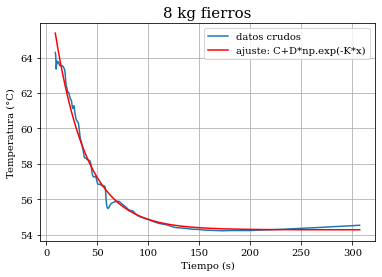

In [19]:
file5 = 'agua 5l+fierros 8kg2022-11-16 13-05-50.csv'
ml= 4.3 #masa de las 27 barras de laton 
datos5 = np.loadtxt(file5, delimiter=',', skiprows=1, unpack=True)

R5=datos5[2] #agregar factor mult
t5=datos5[1]
t5 -= t5[0]
print(len(R5))
#recorto la info q no sirve
R5=R5[20:700]
t5=t5[20:700]
##
T5=(R5-100)/0.385


#ajustes
def fun(x, Kf,Cf,Df):
    return Cf+Df*np.exp(-Kf*x)


#Acá digo que quiero los resultados "res" y la matriz de covarianza "cov" en el ajuste de mis datos con el modelo propuesto

res, cov = curve_fit(fun, t5, T5)  #Los errores de R y L corresponden a la raíz cuadrada de la diagonal de la matriz de covarianza

Kf = res[0]
errorKf = np.sqrt(cov[0,0])
Cf = res[1]
errorCf = np.sqrt(cov[1,1])
Df = res[2]
errorDf = np.sqrt(cov[2,2])

print('kf=', Kf, '+/-', errorKf) #Valor de A
print('Cf=', Cf, '+/-', errorCf) #Valor de B
print('Df=', Df , '+/-', errorDf)
#Defino el dominio que grafico mi modelo

x = np.linspace(t5[0],t5[-1],500)

fig, axes = plt.subplots()
plt.plot(t5, T5)
axes.plot(x, fun(x, Kf,Cf,Df), 'r-') #Pongo los valores obtenido en "res"
plt.title("8 kg fierros",fontsize=fontsize_title)
plt.grid()
#plt.axis([0,2,0,3.5]) #permite seleccionar la escala
plt.ylabel('Temperatura (°C)')
plt.xlabel('Tiempo (s)')
plt.legend(['datos crudos','ajuste: C+D*np.exp(-K*x)'])
plt.show()

#Cel = (ma*Ca*Dh + mc*Cc*Dh) / (ml*(Cl-19))
#print("calor especifico laton",Cel)

#### Calor especifico fierros

In [20]:
mf=8
mc=2
ma=5
Ca=4180
Cfie = (ma*Ca*Df + mc*Cc*Df) / (mf*(Cf-25))

print("calor especifico fierros",Cfie)

calor especifico fierros 1381.431089456466


## Calentamiento agua pre-ebullición (6L)

2687


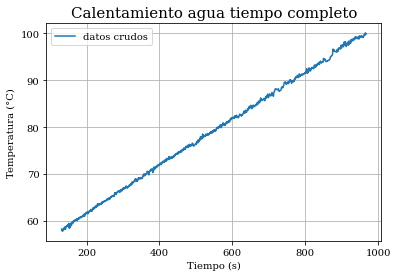

Cc= 767.8377877080553 +/- 6.914500055276109
T0= 51.65181927068265 +/- 0.015612688637045626


<Figure size 700x500 with 0 Axes>

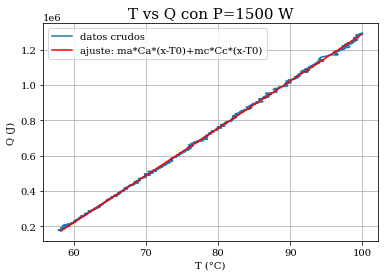

como esto da mal pruebo ver si lo que esta mal es la potencia de la resistencia


In [21]:
file7 = 'EBULLICION 6L2022-11-16 13-35-57.csv'
ml= 4.3 
datos7 = np.loadtxt(file7, delimiter=',', skiprows=1, unpack=True)

R7=datos7[2] #agregar factor mult
t7=datos7[1]
t7 -= t7[0]
print(len(R7))
#recorto la info q no sirve

##
T7=(R7-100)/0.385

t7=t7[300:2200]
T7=T7[300:2200]
#ajustes


fig, axes = plt.subplots()
plt.plot(t7, T7)
plt.title("Calentamiento agua tiempo completo",fontsize=fontsize_title)
plt.grid()
#plt.axis([0,2,0,3.5]) #permite seleccionar la escala
plt.ylabel('Temperatura (°C)')
plt.xlabel('Tiempo (s)')
plt.legend(['datos crudos','ajuste: C+D*np.exp(-K*x)'])
plt.show()



### VEAMOS EL Q 
Ca=4186 #calor especifico agua en joules
mc=2 #masa calorimetro en kg
ma=6 #masa de agua
#Q=1500*t7  #mal, es 1337
Q=1337*t7


def fun(x, Cc,T0):
    return ma*Ca*(x-T0)+mc*Cc*(x-T0)


#Acá digo que quiero los resultados "res" y la matriz de covarianza "cov" en el ajuste de mis datos con el modelo propuesto

res, cov = curve_fit(fun, T7, Q)  #Los errores de R y L corresponden a la raíz cuadrada de la diagonal de la matriz de covarianza

Cc = res[0]
errorCc = np.sqrt(cov[0,0])
T0 = res[1]
errorT0 = np.sqrt(cov[1,1])

print('Cc=', Cc, '+/-', errorCc) #Valor de A
print('T0=', T0, '+/-', errorT0) #Valor de B

#Defino el dominio que grafico mi modelo

x = np.linspace(T7[0],T7[-1],500)

#Grafico mis datos y el modelo obtenido en la misma gráfica
plt.figure(figsize =figsize, dpi=100)
fig, axes = plt.subplots()
plt.ion()
plt.plot(T7, Q)
axes.plot(x, fun(x,Cc,T0), 'r-') #Pongo los valores obtenido en "res"
plt.title("T vs Q con P=1500 W",fontsize=fontsize_title)
plt.grid()
#plt.axis([0,2,0,3.5]) #permite seleccionar la escala
plt.ylabel('Q (J)')
plt.xlabel('T (°C)')
plt.legend(['datos crudos','ajuste: ma*Ca*(x-T0)+mc*Cc*(x-T0)'])
plt.show()

print("como esto da mal pruebo ver si lo que esta mal es la potencia de la resistencia")




### Como ajusta mal saco la verdadera potencia de la resistencia

In [22]:
def fun(x, w):
    return w*t

Q0=ma*Ca*(T7-52)+mc*460*(T7-52)
#Acá digo que quiero los resultados "res" y la matriz de covarianza "cov" en el ajuste de mis datos con el modelo propuesto

res, cov = curve_fit(fun, t7, Q0)  #Los errores de R y L corresponden a la raíz cuadrada de la diagonal de la matriz de covarianza

w = res[0]
errorw = np.sqrt(cov[0,0])


print('w=', w, '+/-', errorw) #Valor de A

#Defino el dominio que grafico mi modelo





w= 1337.635218197157 +/- 3.266072464839196


## Ebullición (5L)

2213
len 2213


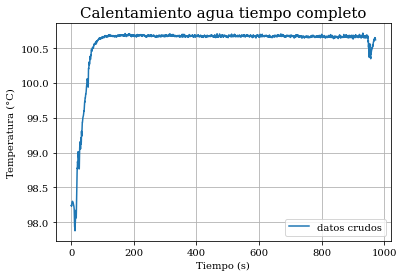

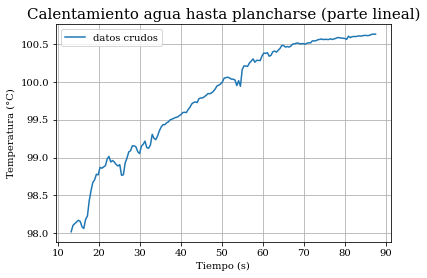

In [23]:
file6 = 'EBULLICION POSTA 5L2022-11-16 13-55-23.csv'
ml= 4.3 #masa de las 27 barras de laton 
datos6 = np.loadtxt(file6, delimiter=',', skiprows=1, unpack=True)

R6=datos6[2] #agregar factor mult
t6=datos6[1]
t6 -= t6[0]
print(len(R6))
#recorto la info q no sirve

##
T6=(R6-100)/0.385

print("len",len(T6))
#ajustes


fig, axes = plt.subplots()
plt.plot(t6, T6)
plt.title("Calentamiento agua tiempo completo",fontsize=fontsize_title)
plt.grid()
#plt.axis([0,2,0,3.5]) #permite seleccionar la escala
plt.ylabel('Temperatura (°C)')
plt.xlabel('Tiempo (s)')
plt.legend(['datos crudos','ajuste: C+D*np.exp(-K*x)'])
plt.show()


t0=30
tf=200
#plt.plot(t6,T6)   #desmarcar para corroborar
plt.plot(t6[t0:tf],T6[t0:tf])
plt.title("Calentamiento agua hasta plancharse (parte lineal)",fontsize=fontsize_title)
plt.grid()
#plt.axis([0,2,0,3.5]) #permite seleccionar la escala
plt.ylabel('Temperatura (°C)')
plt.xlabel('Tiempo (s)')
plt.legend(['datos crudos','ajuste: C+D*np.exp(-K*x)'])
plt.show()




### estudio la lineal para saber a que temperatura se plancha

pendiente= -1.673545173219715e-05 +/- 1.0651120720637442e-06
Temperatura ebullición 100.68264225420911 +/- 0.0006810667900471977


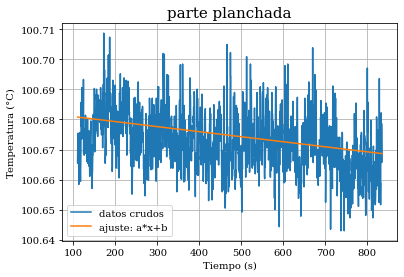

In [24]:
t0=250
tf=1900
Tc=T6[t0:tf]

def fun(x, a,b):
    return a*x+b



res, cov = curve_fit(fun, t7[t0:tf], Tc) 

a = res[0]
errora = np.sqrt(cov[0,0])
b = res[1]
errorb = np.sqrt(cov[1,1])


print('pendiente=', a, '+/-', errora) #Valor de A
print('Temperatura ebullición', b, '+/-', errorb)

#plt.plot(t6,T6)   #desmarcar para corroborar
plt.plot(t6[t0:tf],T6[t0:tf])
plt.plot(t6[t0:tf],fun(t6[t0:tf],a,b))
plt.title("parte planchada",fontsize=fontsize_title)
plt.grid()
#plt.axis([0,2,0,3.5]) #permite seleccionar la escala
plt.ylabel('Temperatura (°C)')
plt.xlabel('Tiempo (s)')
plt.legend(['datos crudos','ajuste: a*x+b'])
plt.show()



